# Exhibition and Publication Trends
* extract exhibitions and find trends with culture/time period/gender/race
* extract publication and find trends with culture/time period/gender/race
* see if themes are grouped in time- attributed to one person
* see if collecting trends can be found and linked to exhibition 
* see if these collecting/publication/exhibition trends can be linnked to politics/current events/acedemic trends

# Collecting Trends

In [138]:
# import libraries

import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

import ast  # For safely evaluating strings

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

from IPython.display import display, Image
import warnings 
  
import os
from dotenv import load_dotenv
warnings.filterwarnings('ignore') 
# Load the .env file
load_dotenv()

api_key = os.environ.get("API_KEY") 


In [16]:
def append_records(df, url):
    """
    Loads one page of records from Harvard Art database and appends to a dataframe. 
    Usage:
    while url:
    df, url = append_records(df, url)

    Args:
        df: dataframe to append new records to
        url: url page to pull new records from

    Returns:
        df: new dataframe with added records
        url: url if next page is available, else None
    """
    
    r = requests.get(url)

    # Convert data to JSON format
    data = r.json()
    
    # Extract the info 
    info = data['info']

    # concat dataframe
    df2 = pd.DataFrame(data['records'])
    df = pd.concat([df, df2], axis = 0)

    
    # Error handling if it reaches >10,000 records
    try:
        if (info['next']):
            url = info['next']
    except:
        return df, None
    return df, url


In [33]:
# create inital dataframe
df = pd.DataFrame()
    
# Find all recorded views 
url = 'https://api.harvardartmuseums.org/exhibition?fields=*&apikey=' + api_key + '&size=100'


# build dataframe from query
while url:
    df, url = append_records(df, url)

In [35]:
df.shape
df.to_csv('exhibitions.csv')

In [37]:
print(f"We were able to import {df.shape[0]} records.")

We were able to import 4973 records.


## There are 4973 exhibition records. Lets plot them by year.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4973 entries, 0 to 4972
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4973 non-null   int64  
 1   shortdescription    121 non-null    object 
 2   htmldescription     257 non-null    object 
 3   images              521 non-null    object 
 4   begindate           4962 non-null   object 
 5   color               0 non-null      float64
 6   description         257 non-null    object 
 7   createdate          4973 non-null   object 
 8   exhibitionid        4973 non-null   int64  
 9   title               4973 non-null   object 
 10  primaryimageurl     521 non-null    object 
 11  temporalorder       4973 non-null   int64  
 12  url                 4973 non-null   object 
 13  textiledescription  257 non-null    object 
 14  enddate             4946 non-null   object 
 15  id                  4973 non-null   int64  
 16  lastup

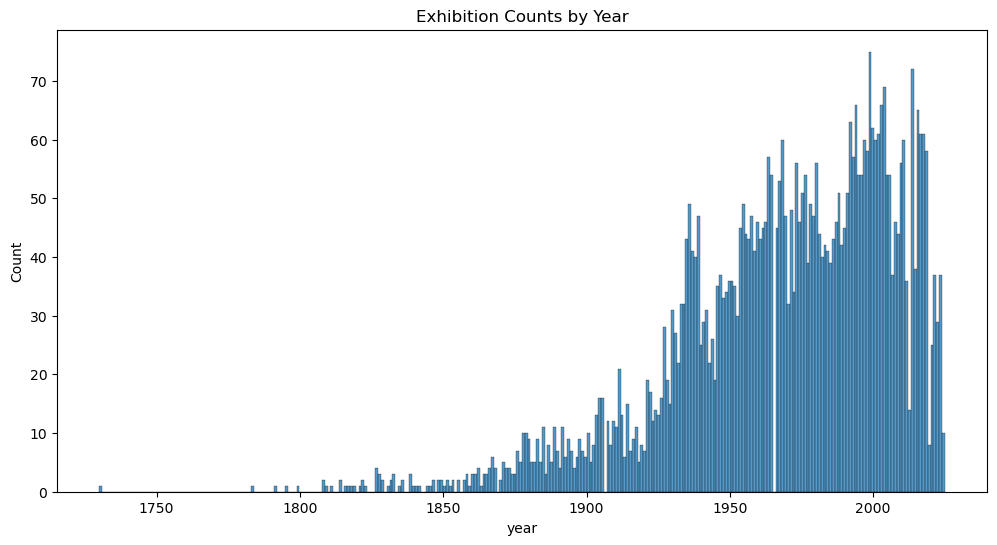

In [224]:
df = pd.read_csv('exhibitions.csv')
print(df.info())
df['begindate'] = pd.to_datetime(df['begindate'], errors = 'coerce')
df['year'] = df['begindate'].dt.year

plt.figure(figsize=(12, 6))
plt.title("Exhibition Counts by Year")
sns.histplot(df['year'], bins = 300)
plt.show()

## Now we will extract information about the exhibition curators.

In [236]:
def extract_from_json(people_entry):
    try:
        if isinstance(people_entry, str):
            data = ast.literal_eval(people_entry)
            return next((item['name'] for item in data if 'name' in item), None)
        elif isinstance(people_entry, list):
            return next((item['name'] for item in people_entry if 'name' in item), None)
    except:
        return None

df['name'] = df['people'].apply(extract_from_json)


display(df[:20])

,Unnamed: 0,shortdescription,htmldescription,images,begindate,color,description,createdate,exhibitionid,title,primaryimageurl,temporalorder,url,textiledescription,enddate,id,lastupdate,poster,people,venues,publications,videos,year,name
0,0,NaN,NaN,"[{'date': None, 'copyright': None, 'imageid': 167190, 'idsid': 43188566, 'format': 'image/jpeg', 'caption': None, 'description': None, 'technique': None, 'renditionnumber': '51896', 'displayorder': 1, 'baseimageurl': 'https://nrs.harvard.edu/urn-3:HUAM:51896_dynmc', 'alttext': None, 'width': 1024, 'iiifbaseuri': 'https://ids.lib.harvard.edu/ids/iiif/43188566', 'height': 783}]",1972-04-19,NaN,NaN,2006-03-27T16:35:46-05:00,93,American Photographs at Harvard,https://nrs.harvard.edu/urn-3:HUAM:51896_dynmc,2350,https://www.harvardartmuseums.org/visit/exhibitions/93,NaN,1972-06-18,93,2025-04-02T04:36:03-04:00,"{'imageurl': 'https://nrs.harvard.edu/urn-3:HUAM:51896_dynmc', 'caption': None}",NaN,NaN,NaN,NaN,1972.0,None
1,1,NaN,"<p>In 1937, in one of its most far-sighted and spectacular purchases ever, the Fogg Art Museum acquired 27 Italian baroque terracotta sculptures, 15 of which are studies by the greatest sculptor of the 17th century, Gian Lorenzo Bernini (1598–1680). They include saints and allegorical figures, but perhaps most memorable are the extraordinarily vivid angels, seemingly descending directly from a heavenly realm in swirls of flowing drapery. Although small in scale, these sketches are monumental in conception. Nineteen ninety-eight is the quartercentenary of Bernini&#8217;s birth, and this event is being marked by exhibitions in Chicago, Philadelphia, and Washington D.C., as well as in Rome. </p>\n\n<p>As the guardian of the most important body of Bernini’s intimate work-in-progress, the Harvard University Art Museums have dedicated a permanent collection gallery to these sculptures. Most of the works have not been on public exhibition for many years and they return to view following the most comprehensive study of such a body of material ever undertaken. The results of this collaborative research by members of the Fogg’s Department of Paintings, Sculpture, and Decorative Art and the Straus Center for Conservation and Technical Studies informs this innovative reinstallation and has been published as an issue of the <a href=""https://shop.harvardartmuseums.org/collections/frontpage/products/sketches-in-clay-for-projects-by-gian-lorenzo-bernini-theoretical-technical-and-case-studies-harvard-university-art-museums-bulletin-vol-6-no-3-ivan-gaskell-and-henry-lie"">Art Museums’ <em>Bulletin</em></a>. </p>\n\n<p>Organized by Ivan Gaskell, Margaret S. Winthrop Curator, and Colette Czapski Hemingway, Andrew W. Mellon Intern, 1996–98, with contributions by Jeannine O’Grody, National Endowment for the Arts Intern, 1995–96, Department of Paintings, Sculpture, and Decorative Arts, Fogg Art Museum. </p>\n\n<p>Funding for the installation and its preparation was generously provided by the Samuel H. Kress Foundation, the Massachusetts Cultural Council, the Andrew W. Mellon Foundation, and the Seymour Slive Teaching Exhibition Fund of the Harvard University Art Museums.</p>","[{'date': '2007-10-30', 'copyright': 'President and Fellows of Harvard College', 'imageid': 273852, 'idsid': 7506328, 'format': 'image/jpeg', 'caption': None, 'description': None, 'technique': None, 'renditionnumber': 'GS03664', 'displayorder': 1, 'baseimageurl': 'https://nrs.harvard.edu/urn-3:HUAM:GS03664_dynmc', 'alttext': None, 'width': 1348, 'iiifbaseuri': 'https://ids.lib.harvard.edu/ids/iiif/7506328', 'height': 2048}]",1998-02-28,NaN,"In 1937, in one of its most far-sighted and spectacular purchases ever, the Fogg Art Museum acquired 27 Italian baroque terracotta sculptures, 15 of which are studies by the greatest sculptor of the 17th century, Gian Lorenzo Bernini (1598–1680). They include saints and allegorical figures, but perhaps most memorable are the extraordinarily vivid angels, seemingly descending dire

## We can see below 4604 exhibitions do not have a person/curator connected to them. The remaining 389 are listed below by the curator. They are then ploted by year and curator. 
Note, upon further inspection it seems that most recent Harvard exhibitions do have a curator listed. Exhibitions at other institutions do not have a curator listed.

In [132]:
print(df['name'].value_counts(dropna = False))
name_list = df['name'].value_counts()[(df['name'].value_counts()>=3)].index
list(name_list)

name
None                         4604
Laura Muir                     25
Stuart Cary Welch              25
Robert D. Mowry                23
Mary McWilliams                22
Stephan Wolohojian             22
Mary Schneider Enriquez        14
Henri Zerner                   13
Susanne Ebbinghaus             13
Lynette Roth                   10
Amy Brauer                      9
Melissa Moy                     8
Michelle Lamuniere              6
Elizabeth M. Rudy               6
Deborah Martin Kao              5
Miriam Stewart                  5
Susan Dackerman                 5
Rochelle Kessler                5
Helen Molesworth                4
William W. Robinson             4
Peter Nisbet                    4
Jennifer Roberts                4
Robin Kelsey                    4
Sarah Kianovsky                 4
Julia Bailey                    3
Ivan Gaskell                    3
Soyoung Lee                     3
Miyeko Murase                   3
Ewa Lajer-Burcharth             3
Michele d

['Stuart Cary Welch',
 'Laura Muir',
 'Robert D. Mowry',
 'Mary McWilliams',
 'Stephan Wolohojian',
 'Mary Schneider Enriquez',
 'Henri Zerner',
 'Susanne Ebbinghaus',
 'Lynette Roth',
 'Amy Brauer',
 'Melissa Moy',
 'Michelle Lamuniere',
 'Elizabeth M. Rudy',
 'Deborah Martin Kao',
 'Miriam Stewart',
 'Susan Dackerman',
 'Rochelle Kessler',
 'Helen Molesworth',
 'William W. Robinson',
 'Peter Nisbet',
 'Jennifer Roberts',
 'Robin Kelsey',
 'Sarah Kianovsky',
 'Julia Bailey',
 'Ivan Gaskell',
 'Soyoung Lee',
 'Miyeko Murase',
 'Ewa Lajer-Burcharth',
 'Michele de Angelis',
 'Suzanne Blier',
 'Rachel Saunders']

<function matplotlib.pyplot.show(close=None, block=None)>

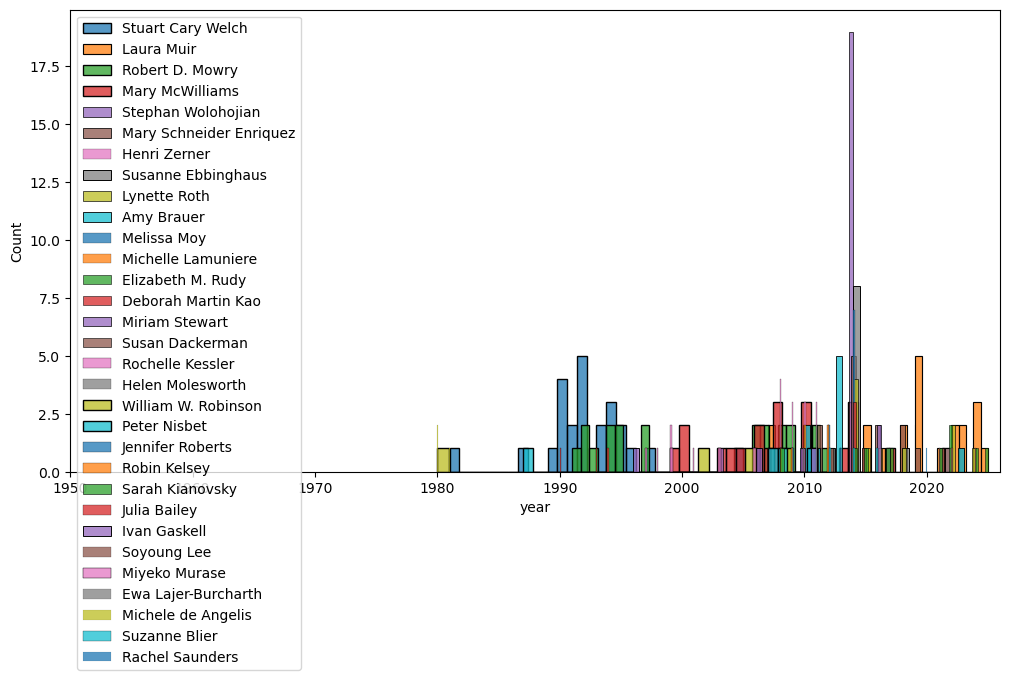

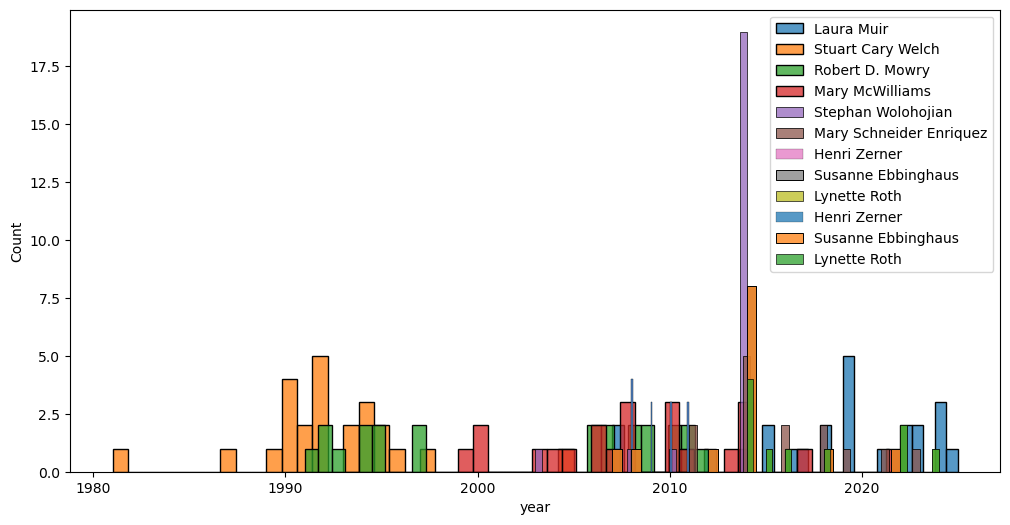

In [134]:
plt.figure(figsize=(12, 6))
for name in name_list:
    if name != None:
        j = df[df['name'] == name]['year']
        sns.histplot(j, label= name, bins = 30)
plt.xlim(1950, 2026)
plt.legend()
plt.show

Laura = df[df['name'] == 'Laura Muir']['year']
Stuart = df[df['name'] == 'Stuart Cary Welch']['year']
Robert = df[df['name'] == 'Robert D. Mowry']['year']
Mary = df[df['name'] == 'Mary McWilliams']['year']
Stephan = df[df['name'] == 'Stephan Wolohojian']['year']
Mary2 = df[df['name'] == 'Mary Schneider Enriquez']['year']
Henri = df[df['name'] == 'Henri Zerner']['year']
Susan = df[df['name'] == 'Susanne Ebbinghaus']['year']
Lyne = df[df['name'] == 'Lynette Roth']['year']
Amy = df[df['name'] == 'Amy Brauer  ']['year']
Mary2 = df[df['name'] == 'Mary Schneider Enriquez']['year']
Henri = df[df['name'] == 'Henri Zerner']['year']
Susan = df[df['name'] == 'Susanne Ebbinghaus']['year']
Lyne = df[df['name'] == 'Lynette Roth']['year']
Amy = df[df['name'] == 'Amy Brauer  ']['year']


plt.figure(figsize=(12, 6))
sns.histplot(Laura, label= "Laura Muir", bins = 30)
sns.histplot(Stuart, label= 'Stuart Cary Welch', bins = 30)
sns.histplot(Robert, label= 'Robert D. Mowry', bins = 30)
sns.histplot(Mary, label= 'Mary McWilliams', bins = 30)
sns.histplot(Stephan, label= 'Stephan Wolohojian', bins = 30)
sns.histplot(Mary2, label= 'Mary Schneider Enriquez', bins = 30)
sns.histplot(Henri, label= 'Henri Zerner', bins = 30)
sns.histplot(Susan, label= 'Susanne Ebbinghaus', bins = 30)
sns.histplot(Lyne, label= 'Lynette Roth', bins = 30)
sns.histplot(Amy, label= 'Amy Brauer  ', bins = 30)
sns.histplot(Henri, label= 'Henri Zerner', bins = 30)
sns.histplot(Susan, label= 'Susanne Ebbinghaus', bins = 30)
sns.histplot(Lyne, label= 'Lynette Roth', bins = 30)
sns.histplot(Amy, label= 'Amy Brauer  ', bins = 30)

plt.legend()
plt.show

In [100]:
df[df['name'] != None].year.unique()

array([1972., 1998., 1974., 2003., 1983., 2014., 2015., 2016., 2018.,
       2005., 2007., 2008., 2009., 2006., 1997., 1995., 1994., 1992.,
       1993., 1991., 1980., 1981., 1982., 1989., 2010., 1922., 2011.,
       2012., 1931., 2021., 1959., 1996., 1884., 1943., 1986., 1973.,
       1930., 1970., 1978., 1966., 1976., 1960., 1954., 1964., 1936.,
       1957., 1941., 1932., 1910., 1879., 1927., 1950., 1947., 1946.,
       1979., 1958., 1942., 1938., 1955., 1968., 1944., 1988., 1956.,
       1987., 1865., 1814., 1819., 1829., 1850., 1877., 1878., 1894.,
       1903., 1906., 1851., 1866., 1867., 1914., 1827., 1861., 1862.,
       1897., 1898., 1990., 1902., 1962., 1939., 1899., 1969., 1967.,
       1984., 1911., 1935., 1961., 1975., 1920., 1971., 1949., 1945.,
       1892., 1912., 1965., 1933., 1937., 1925., 1909., 1921., 1929.,
       1934., 1913., 1948., 1876., 1904., 1846., 1924., 1891., 1928.,
       1940., 1951., 1917., 1953., 1828., 1839., 1905., 1883., 1874.,
       1901., 1889.,

## Now we can see each major curator alongside of the tiles and years of the shows that they put on.

In [184]:
for person in name_list:
    shows= df[df['name'] == person][['title', 'year']]
    print(person)
    display(shows)


Stuart Cary Welch


,title,year
18,"From Mind, Heart, and Hand: Persian, Turkish, and Indian Drawings from SCWelch",2005.0
46,The Ottomans: Images from East and West,1989.0
218,Arabesque,1990.0
432,"Eyes to the East: Indian, Persian, and Turkish Art Given by Harvard Graduates",1990.0
443,Five Masters of Persian and Indian Painting,1992.0
480,"From India's Hills and Plains: Rajput Painting from the Punjab and Rajasthan, 17th through 19th Centuries",1993.0
496,"Gods, Thrones, and Peacocks - Revisited: Northern Indian Miniatures from two Traditions, Fifteenth to Nineteenth Centuries",1990.0
521,Hot as Curry - Subtle as Moonlight: Masterpieces of Rajput Painting,1991.0
601,"Linear Graces ... and Disgraces: Part I, Drawings from the Courts of Persia, Turkey, and India, 15th-19th Centuries",1994.0
602,"Linear Graces ... and Disgraces: Part II, Drawings from the Courts of Persia, Turkey, and India, 15th-19th Centuries",1994.0


Laura Muir


,title,year
19,HAA 1 Survey Course: Landmarks of World Art and Architecture [Spring 2007],2007.0
90,32Q: 1520 Art in Germany Between the Wars (Interwar and Bauhaus),2014.0
3093,"Paintings by Max Beckmann from the Pinakothek der Moderne, Munich",2007.0
3169,"Lyonel Feininger: Photographs, 1928-1939",2011.0
3382,"Recent Acquisitions, Part I: Contemporary Photographs",2012.0
3730,"European and American Pop Art, 1955-1975",2015.0
3745,A History of Photography,2015.0
3867,Modern Art and Modernity,2016.0
4059,What about Revolution? Aesthetic Practices after 1917,2017.0
4101,Looking Back: The Western Tradition in Retrospect,2018.0


Robert D. Mowry


,title,year
32,Paragons of Wisdom and Virtue: East Asian Figure Painting,1997.0
33,"Rocks, Mountains, Landscapes, and Gardens: The Essence of East Asian Painting (1997)",1997.0
34,"Art of the Fan: China, Korea, Japan",1995.0
35,Asian Art: Recent Acquisitions,1995.0
36,Women and the Arts of Asia,1994.0
37,East Asia in the Nineteenth Century,1994.0
38,The Arts of Korea,1992.0
39,Chinese and Japanese Painting of the Early Modern Era,1993.0
40,Later Chinese and Japanese Figure Painting in Decorative Arts,1992.0
41,Chinese Painting and Decorative Arts from the Permanent Collection,1991.0


Mary McWilliams


,title,year
96,32Q: 2550 Islamic,2014.0
97,32Q: 2590 South and Southeast Asia,2014.0
2568,The Enlightened Eye: Gifts from John Goelet,2000.0
2572,Courts and Countryside: Islamic Paintings from the 14th through the 17th Century,1999.0
2638,The Continuous Stroke of a Breath: Calligraphy from the Islamic World,2003.0
2858,The Sport of Kings: Art of the Hunt in Iran and India,2005.0
2874,The Tablet and the Pen: Drawings from the Islamic World,2006.0
2916,"Closely Focused, Intensely Felt: Selections from the Norma Jean Calderwood Collection of Islamic Art",2004.0
3044,"Overlapping Realms: Arts of the Islamic World and India, 900-1900",2006.0
3118,"On the Path of Madness: Representations of Majnun in Persian, Turkish, and Indian Painting",2007.0


Stephan Wolohojian


,title,year
21,Re-View: S422-423 Western Art of the Middle Ages & Renaissance,2008.0
63,32Q: 1220 Wertheim,2014.0
65,32Q: 2710 North Arcade,2014.0
66,32Q: 2700 Impressionism,2014.0
67,32Q: 2460 East Arcade,2014.0
68,32Q: 2440 Medieval,2014.0
69,32Q: 2410 South Arcade,2014.0
70,32Q: 2400 French/Italian/Spanish,2014.0
71,32Q: 2340 Cabinet Gallery,2014.0
72,32Q: 2300 Dutch & Flemish,2014.0


Mary Schneider Enriquez


,title,year
51,Re-View: S118 Paper Rotation 1 (Sept 2011),2011.0
80,32Q: 1100 60’s Experiment,2014.0
82,32Q: 1120 Contemporary Art,2014.0
83,32Q: 1200 Mid-Century Abstraction I (Painterly Abstraction),2014.0
85,32Q: 1310 Surrealism,2014.0
3317,Re-View: European and American Art Since 1900,2011.0
3715,Everywhen: The Eternal Present in Indigenous Art from Australia,2016.0
3841,Doris Salcedo: The Materiality of Mourning,2016.0
4220,"Crossing Lines, Constructing Home: Displacement and Belonging in Contemporary Art",2019.0
4430,Krzysztof Wodiczko: Portrait,2021.0


Henri Zerner


,title,year
26,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 08 Rotation 1),2008.0
27,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 08 Rotation 3),2008.0
3127,"HAA 10 Survey Course: The Western Tradition, Art Since the Renaissance",2008.0
3203,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 08 Rotation 2),2008.0
3216,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 09 Rotation 1),2009.0
3217,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 09 Rotation 2),2009.0
3218,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 09 Rotation 3),2009.0
3257,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 10 Rotation 1),2010.0
3300,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 10 Rotation 2),2010.0
3301,HAA 10 Survey Course (S421): The Western Tradition: Art Since the Renaissance (Fall 10 Rotation 3),2010.0


Susanne Ebbinghaus


,title,year
53,32Q: 3740 Egyptian,2014.0
54,32Q: 3460 East Arcade,2014.0
55,32Q: 3400 Greek,2014.0
56,32Q: 3710 North Arcade,2014.0
57,32Q: 3200 West Arcade,2014.0
58,32Q: 3410 South Arcade,2014.0
59,32Q: 3700 Roman,2014.0
60,32Q: 3440 Middle East,2014.0
3071,Gods in Color: Painted Sculpture of Classical Antiquity,2007.0
3147,Re-View: S422 Ancient & Byzantine Art & Numismatics,2008.0


Lynette Roth


,title,year
64,"32Q: 1440 Secessionism: Munich, Vienna, Berlin (Expressionism)",2014.0
88,32Q: 1500 Art in Germany Between the Wars (Expressionism-Interwar),2014.0
89,32Q: 1510 German Expressionist Sculpture,2014.0
3708,Rebecca Horn: “Work in Progress”,2014.0
3842,Private Practice,2015.0
3939,"Inventur—Art in Germany, 1943–55",2018.0
4434,Disrupt the View: Arlene Shechet at the Harvard Art Museums,2022.0
4598,"Folding, Refraction, Touch: Modern and Contemporary Art in Dialogue with Wolfgang Tillmans",2016.0
4605,White Shadows: Anneliese Hager and the Camera-less Photograph,2022.0
4970,Made in Germany? Art and Identity in a Global Nation,2024.0


Amy Brauer


,title,year
3254,Re-View: S426A (Large Niche) #1: The Past and the Present: British Art of the 19th Century,2010.0
3290,Re-View: S426A (Large Niche) #2: The Past and the Present: British Art of the 19th Century,2010.0
3320,"HAA 176m Berlin and Moscow, 1918/1930 Rotation #1 (S421) Spring 2011",2011.0
3563,Strategies of Exhibition Design in the Twentieth Century: History and Theory,2013.0
3564,Word and Image in Persian Painting,2013.0
3565,The Art of Looking,2013.0
3566,Civil War Project,2013.0
3567,"Boston Taste, 1670 - 1970",2013.0
4468,A World Within Reach: Greek and Roman Art from the Loeb Collection,2023.0


Melissa Moy


,title,year
61,32Q: 1740 Early China I,2014.0
62,32Q: 2740 Buddhist II,2014.0
94,32Q: 1600 Early China II,2014.0
95,32Q: 1610 Buddhist Art I,2014.0
98,32Q: 2620 Winter Garden,2014.0
99,"32Q: 2600 East Asian, Japanese, Chinese and Korean",2014.0
100,32Q: 1006 East Arcade,2014.0
3937,Adorning the Inner Court: Jun Ware for the Chinese Palace,2017.0


Michelle Lamuniere


,title,year
3195,Re-View: S231 (Islamic rotation: 2) Sacred Sites: Nineteenth Century Photographs of Jerusalem,2009.0
3251,Re-View: S426A (Large Niche) HAA175w Pop Art,2010.0
3253,"Around Antique: Prints, Drawings, and Photographs (Teaching Gallery) S421",2010.0
3463,Laurel Nakadate: Say You Love Me,2011.0
3466,"Recent Acquisitions, Part II: Building the Collection",2012.0
4594,"Recent Acquisitions, Part III: Kerry James Marshall",2012.0


Elizabeth M. Rudy


,title,year
3781,Drawing: The Invention of a Modern Medium,2017.0
4311,Dare to Know: Prints and Drawings in the Age of Enlightenment,2022.0
4510,LaToya M. Hobbs: It’s Time,2024.0
4603,States of Play: Prints from Rembrandt to Delsarte,2021.0
4606,Prints from the Brandywine Workshop and Archives: Creative Communities,2022.0
4969,Edvard Munch: Technically Speaking,2025.0


Deborah Martin Kao


,title,year
81,32Q: 1110 Mid-Century Abstraction II (Post-Painterly Abstraction),2014.0
86,32Q: 1320 Social Realism,2014.0
87,32Q: 1330 Mid-Century Figurative,2014.0
3054,"Classified Documents: The Social Museum of Harvard University, 1903-1931",2007.0
3738,Jesse Aron Green: Ärztliche Zimmergymnastik,2015.0


Miriam Stewart


,title,year
48,Re-View: S425A (Small Niche) Peter Blume,2010.0
3029,Under Cover: Artists' Sketchbooks,2006.0
3741,Body Image in French Art and Visual Culture (18th and 19th Centuries),2016.0
3758,"Drawings from the Age of Bruegel, Rubens, and Rembrandt",2016.0
4073,"The Art of Drawing in the Early Dutch Golden Age, 1590–1630: Selected Works from the Abrams Collection",2017.0


Susan Dackerman


,title,year
3034,DISSENT!,2006.0
3101,"Kara Walker: ""Harper's Pictorial History of the Civil War (Annotated)""",2007.0
4591,Prints and the Pursuit of Knowledge in Early Modern Europe,2011.0
4593,Jasper Johns / In Press: The Crosshatch Works and the Logic of Print,2012.0
4596,Corita Kent and the Language of Pop,2015.0


Rochelle Kessler


,title,year
1832,"Rasika, the Discerning Connoisseur: Indian Paintings from the John Kenneth Galbraith Collection",1998.0
1866,"Shadows of God On Earth: Arts of the Ottoman, Safavid, and Mughal Dynasties",1997.0
1933,Divinely Inspired: Images of Mystics and Mendicants,1999.0
2331,The Sensuous and the Sublime: Representations of Love in the Arts of the Middle East and Southern Asia,2001.0
2571,A Grand Legacy: Arts of the Ottoman Empire,1999.0


Helen Molesworth


,title,year
47,Re-View: S425A (Small Niche) New Acquisition: Lorna Simpson,2010.0
3092,Contemporary Art from the Harvard University Art Museums Collections,2007.0
3112,Long Life Cool White: Photographs by Moyra Davey,2008.0
3220,"ACT UP New York: Activism, Art and the AIDS Crisis, 1987-1993",2009.0


William W. Robinson


,title,year
22,Re-View: S426A (Large Niche) 19th Century French Portrait Drawings,2009.0
2494,Bruegel to Rembrandt: Dutch and Flemish Drawings from the Maida and George Abrams Collection,2002.0
3032,Rembrandt and the Aesthetics of Technique,2006.0
3181,The Draughtsman at Work. Drawing in the Golden Century of Dutch Art,1980.0


Peter Nisbet


,title,year
3105,Light Display Machines: Two Works by László Moholy-Nagy,2007.0
3153,Re-View: S118 European & American Art since 1900,2008.0
3168,Lyonel Feininger: Drawings and Watercolors from the William S. Lieberman Bequest to the Busch-Reisinger Museum,2011.0
4254,El Lissitzky 1890-1941,1987.0


Jennifer Roberts


,title,year
31,Re-View: S426A (Large Niche) #2: CB30 Photography and Society & HAA172w American Art and Modernity,2009.0
52,"GenEd US12 American Encounters: Art, Contact, and Conflict, 1560-1860 (S427) Spring 2012",2012.0
3519,"American Art and Modernity, 1865–1965",2012.0
3562,Modern Art and Modernity,2013.0


Robin Kelsey


,title,year
28,Re-View: S426A (Large Niche) HAA Lit & Arts B24,2008.0
30,Re-View: S426A (Large Niche) #1: CB30 Photography and Society & HAA172w American Art and Modernity,2009.0
3446,HAA178m Cold War Photography (S427) Spring 2012,2012.0
3518,Seeing Is Believing: A History of Photography,2012.0


Sarah Kianovsky


,title,year
84,32Q: 1300 Early Modernism,2014.0
3150,Re-View: S427 Impressionist & Postimpressionist Art,2008.0
3717,The Dorothy and Herbert Vogel Collection: Fifty Works for Fifty States,2015.0
4599,"Reverie: Christopher Wilmarth, Before and After Mallarmé",2017.0


Julia Bailey


,title,year
309,Colors of the Caucasus,1990.0
363,Earthly Paradise: Gardens in Islamic Art,1993.0
768,Pattern and Purpose. Decorative Arts of Islam.,1994.0


Ivan Gaskell


,title,year
3030,"""A Public Patriotic Museum"": Artworks and Artifacts from the General Artemas Ward House",2006.0
3313,Tangible Things,2011.0
4388,Investigating the Renaissance,1996.0


Soyoung Lee


,title,year
103,Recent Acquisitions 2020,2021.0
4462,"Earthly Delights: 6,000 Years of Asian Ceramics",2022.0
4557,Future Minded: New Works in the Collection,2024.0


Miyeko Murase


,title,year
3490,Flowing Streams and Rivers in Japanese Life,2006.0
3495,Great Waves: Chinese Themes in the Arts of Korea and Japan,2003.0
3514,Through the Seasons: Japanese Art in Nature,1999.0


Ewa Lajer-Burcharth


,title,year
3208,Re-View: S426A (Large Niche) HAA171x Exoticism and Orientalism,2009.0
3318,"HAA 271x The Origins of Modernity: The ""New"" 18th Century Rotation #1: Large Niche (S426A) Spring 2011",2011.0
3319,"HAA 271x The Origins of Modernity: The ""New"" 18th Century Rotation #2: Large Niche (S426A) Spring 2011",2011.0


Michele de Angelis


,title,year
42,Sacred Symbols of Islam,1980.0
43,The Hofer Bequest and Islamic Decorative Arts from the Fogg Collection,1980.0
44,Architectural Themes in the Arts of Islam,1981.0


Suzanne Blier


,title,year
3520,Landmarks of World Art and Architecture,2012.0
3623,World’s Fairs,2014.0
3747,Art of Jazz: Form,2016.0


Rachel Saunders


,title,year
4170,Prince Shōtoku: The Secrets Within,2019.0
4197,Japan on Paper,2019.0
4604,Painting Edo: Japanese Art from the Feinberg Collection,2020.0


## Lets pull in our object data and cross reference the art divisions collected by year

In [242]:
o_df = pd.read_csv('art_objects.csv')


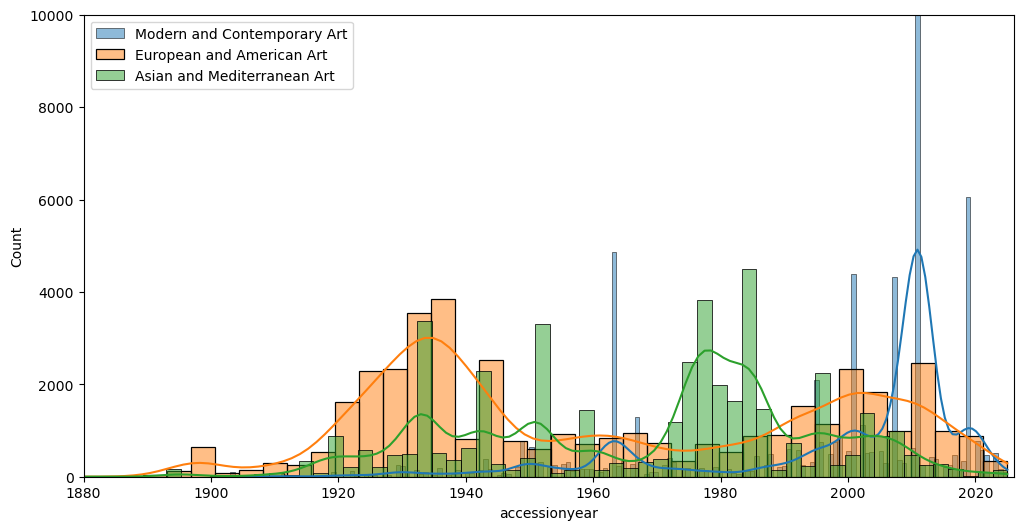

In [256]:
plt.figure(figsize=(12, 6))
sns.histplot(data=o_df[o_df['division']== 'Modern and Contemporary Art'], x='accessionyear', kde=True, label = 'Modern and Contemporary Art')
sns.histplot(data=o_df[o_df['division']== 'European and American Art'], x='accessionyear', kde=True, label = 'European and American Art')
sns.histplot(data=o_df[o_df['division']== 'Asian and Mediterranean Art'], x='accessionyear', kde=True, label = 'Asian and Mediterranean Art')
plt.ylim(0,10000)
plt.xlim(1880,2026)
plt.legend()
plt.show()

## Observations:
* Largely European and American Art collecting was dominant until the 1970s when the volume of Asian and Mediterranean art collected rose dramatically.
* Beginning in the 1990s, collecting of European and American Art again achieved dominance with discrete clusters of high volumes of Modern and Contemporary collecting between 2000 and 2025.

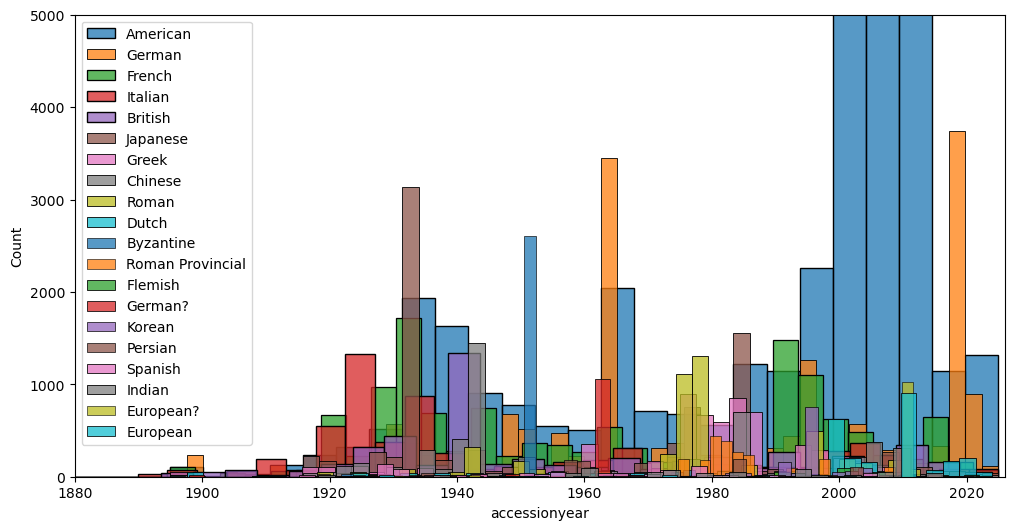

In [280]:
top_20 = o_df['culture'].value_counts()[:20].index
plt.figure(figsize=(12, 6))
for cult in top_20: 
    sns.histplot(data=o_df[o_df['culture']== cult], x='accessionyear', label = cult, bins = 50)
plt.ylim(0,5000)
plt.xlim(1880,2026)
plt.legend()
plt.show()

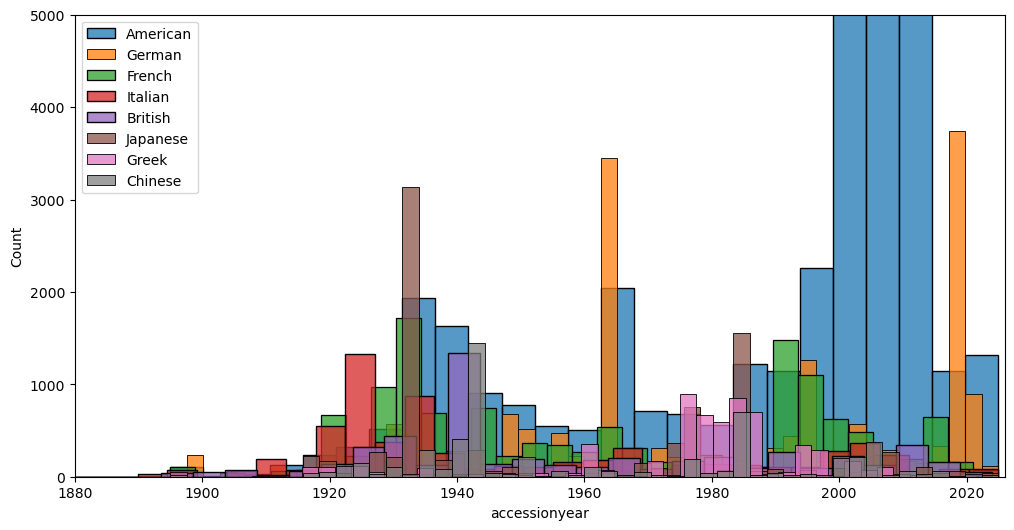

In [292]:
top_8 = o_df['culture'].value_counts()[:8].index
plt.figure(figsize=(12, 6))
for cult in top_8: 
    sns.histplot(data=o_df[o_df['culture']== cult], x='accessionyear', label = cult, bins= 50)
plt.ylim(0,5000)
plt.xlim(1880,2026)
plt.legend()
plt.show()

## Observations:
* Collecting of American art was dominant between 1970 and today. 
* There is discrete high-volume collecting of German art both in the 1960s and near 2020. 
* High-volume collecting of Japanese art in the 1930s and 1980s.
* French art had a surge in the 1980s.
* There was a long cluster of collecting Greek art in the 1970s-1980s.

In [10]:
display(objects_df[~objects_df['exhibitions'].isna()])

,Unnamed: 0,copyright,contextualtextcount,creditline,accesslevel,createdate,dateoflastpageview,classificationid,division,markscount,publicationcount,totaluniquepageviews,terms,contact,colorcount,rank,id,state,verificationleveldescription,period,images,worktypes,imagecount,totalpageviews,accessionyear,standardreferencenumber,signed,classification,relatedcount,verificationlevel,primaryimageurl,titlescount,peoplecount,style,lastupdate,commentary,periodid,technique,edition,description,medium,lendingpermissionlevel,title,accessionmethod,colors,provenance,groupcount,dated,department,dateend,titles,people,url,dateoffirstpageview,century,objectnumber,labeltext,datebegin,culture,exhibitioncount,imagepermissionlevel,mediacount,objectid,techniqueid,dimensions,seeAlso,marks,related,places,exhibitions,publications,groupings,gallery,tags,details,contextualtext,media,videos,audio
23,23,NaN,0,"Harvard Art Museums/Fogg Museum, Gift of Belinda L. Randall from the collection of John Witt Randall",1,1997-10-24T00:00:00-04:00,2024-09-24,23,European and American Art,1,0,73,"{'century': [{'name': '17th century', 'id': 37525788}], 'culture': [{'name': 'Netherlandish', 'id': 37528173}], 'place': [{'name': 'Europe', 'id': 2028188}, {'name': 'Netherlands', 'id': 2028344}]}",am_europeanamerican@harvard.edu,7,262928,250436,ii/ii,Adequate. Object is adequately described but information may not be vetted,NaN,"[{'date': '2008-06-05', 'copyright': 'President and Fellows of Harvard College', 'imageid': 310953, 'idsid': 20459201, 'format': 'image/jpeg', 'description': None, 'technique': None, 'renditionnumber': 'INV194500', 'displayorder': 1, 'baseimageurl': 'https://nrs.harvard.edu/urn-3:HUAM:INV194500_dynmc', 'alttext': None, 'width': 2117, 'publiccaption': None, 'iiifbaseuri': 'https://ids.lib.harvard.edu/ids/iiif/20459201', 'height': 2550}]","[{'worktypeid': '288', 'worktype': 'print'}]",1,83,NaN,Hollstein 1,NaN,Prints,0,2,https://nrs.harvard.edu/urn-3:HUAM:INV194500_dynmc,1,2,NaN,2025-03-29T05:01:05-04:00,NaN,NaN,Engraving,NaN,NaN,NaN,0,Temptation of Saint Anthony,Gift,"[{'color': '#4b3232', 'spectrum': '#4ab851', 'hue': 'Red', 'percent': 0.31, 'css3': '#2f4f4f'}, {'color': '#c8c8af', 'spectrum': '#b55592', 'hue': 'Green', 'percent': 0.30483870967741933, 'css3': '#c0c0c0'}, {'color': '#323219', 'spectrum': '#3db657', 'hue': 'Brown', 'percent': 0.18811827956989247, 'css3': '#2f4f4f'}, {'color': '#7d644b', 'spectrum': '#b25593', 'hue': 'Yellow', 'percent': 0.10241935483870968, 'css3': '#696969'}, {'color': '#967d64', 'spectrum': '#b65590', 'hue': 'Brown', 'percent': 0.041236559139784947, 'css3': '#808080'}, {'color': '#c8af96', 'spectrum': '#e66c64', 'hue': 'Brown', 'percent': 0.02795698924731183, 'css3': '#d2b48c'}, {'color': '#af967d', 'spectrum': '#c25687', 'hue': 'Brown', 'percent': 0.02543010752688172, 'css3': '#bc8f8f'}]","John Witt Randall, bequest to his sister.\r\nBelinda Lull Randall, sister of John Witt Randall, gift to Harvard University, 1892.\r\n",0,mid-17th century,Department of Prints,17,"[{'titletype': 'Title', 'titleid': 483225, 'displayorder': 1, 'title': 'Temptation of Saint Anthony'}]","[{'role': 'Artist', 'birthplace': 'Antwerp', 'gender': 'unknown', 'displaydate': '1626 - after 1651', 'prefix': None, 'culture': 'Netherlandish', 'displayname': 'Sidrach Willemsen', 'alphasort': 'Willemsen, Sidrach', 'name': 'Sidrach Willemsen', 'personid': 33460, 'deathplace': 'Antwerp', 'displayorder': 1}, {'role': 'Artist after', 'birthplace': 'Antwerp', 'gender': 'unknown', 'displaydate': '1610 - 1690', 'prefix': 'After', 'culture': 'Flemish', 'displayname': 'After David Teniers II', 'alphasort': 'Teniers, David II', 'name': 'David Teniers II', 'personid': 33184, 'deathplace': 'Brussels', 'displayorder': 2}]",https://www.harvardartmuseums.org/collections/object/250436,2009-06-28,17th century,R5224,NaN,0,Netherlandish,1,0,0,250436,98.0,NaN,"[{'id': 'https://iiif.harvardartmuseums.org/manifests/object/250436', 'type': 'IIIF Manifest', 'format': 'applica